In [22]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import json
from pandas.io.json import json_normalize
from functools import reduce

In [23]:
def col_json_to_dict(df,cols):
    "Transform the json values inside a column into list of dictionaries"
    transformed_df = df
    for col in cols:
        transformed_df = transformed_df.assign(**{col: df[col].apply(json.loads)})
    return transformed_df

In [24]:
def col_dict_to_set(df,col,key):
    "Create a set from the values of the dictionaries give a key"
    get_set = lambda dict_list : set([dict_.get(key) for dict_ in dict_list])
    return df.assign(**{col: df[col].apply(get_set)})

In [25]:
def col_filter_dict_with_vals(df,col,field,values):
    "Filter dictionaries with specific values from a column with lists of dictionaries"
    filter_dicts = lambda dict_list: [dict_ for dict_ in dict_list if dict_.get(field) in values]
    return df.assign(**{col: df[col].apply(filter_dicts)})

In [26]:
credits_df = pd.read_csv("./data/tmdb_5000_credits.csv",sep=',', quotechar='"')
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [27]:
movies_df = pd.read_csv("./data/tmdb_5000_movies.csv",sep=',', quotechar='"')\
                .rename({"id":"movie_id"},axis=1)
movies_df.head()

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [28]:
credits_df_cp = credits_df.copy()
movies_df_cp = movies_df.copy()

## Clean movies_df_cp

In [29]:
# movies with empty genre field
len(movies_df_cp[movies_df_cp.astype(str)['genres'] == '[]'])

28

In [30]:
# movies with empty production_companies field
len(movies_df_cp[movies_df_cp.astype(str)['production_companies'] == '[]'])

351

In [31]:
# movies with empty production_companies field
len(movies_df_cp[movies_df_cp.astype(str)['production_countries'] == '[]'])

174

In [32]:
# movies with empty production_companies field
len(movies_df_cp[movies_df_cp.astype(str)['spoken_languages'] == '[]'])

86

## Process movies df

In [33]:
pr_movies_df = movies_df_cp
len(pr_movies_df)

4803

In [34]:
pr_movies_df.head()

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [35]:
# Transform json to list of dictionaries within cols
movies_df_json_cols = ['genres','production_companies','keywords','production_countries','spoken_languages']
cols_to_drop = ['homepage','overview','tagline','original_title']
key = 'name'
movie_id_col = 'movie_id'

pr_movies_df = col_json_to_dict(pr_movies_df,movies_df_json_cols)
for col in movies_df_json_cols :
    pr_movies_df = col_dict_to_set(pr_movies_df,col,key)
pr_movies_df = pr_movies_df.drop(columns = cols_to_drop)
pr_movies_df.head()

,budget,genres,movie_id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"{Action, Science Fiction, Fantasy, Adventure}",19995,"{space travel, futuristic, 3d, society, alien,...",en,150.437577,"{Dune Entertainment, Twentieth Century Fox Fil...","{United Kingdom, United States of America}",2009-12-10,2787965087,162.0,"{Español, English}",Released,Avatar,7.2,11800
1,300000000,"{Action, Fantasy, Adventure}",285,"{afterlife, ocean, swashbuckler, ship, drug ab...",en,139.082615,"{Second Mate Productions, Walt Disney Pictures...",{United States of America},2007-05-19,961000000,169.0,{English},Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"{Action, Crime, Adventure}",206647,"{secret agent, based on novel, united kingdom,...",en,107.376788,"{Danjaq, B24, Columbia Pictures}","{United Kingdom, United States of America}",2015-10-26,880674609,148.0,"{Español, English, Deutsch, Français, Italiano}",Released,Spectre,6.3,4466
3,250000000,"{Action, Crime, Drama, Thriller}",49026,"{flood, cover-up, catwoman, imax, terrorist, c...",en,112.312950,"{Warner Bros., Legendary Pictures, Syncopy, DC...",{United States of America},2012-07-16,1084939099,165.0,{English},Released,The Dark Knight Rises,7.6,9106
4,260000000,"{Action, Science Fiction, Adventure}",49529,"{19th century, space travel, mars, based on no...",en,43.926995,{Walt Disney Pictures},{United States of America},2012-03-07,284139100,132.0,{English},Released,John Carter,6.1,2124


## Process credits df

In [36]:
pr_credits_df = credits_df_cp
credits_df_json_cols = ['cast','crew']
key = 'name'
pr_credits_df = col_json_to_dict(pr_credits_df,credits_df_json_cols)
pr_credits_df = pr_credits_df.assign(actors = pr_credits_df[credits_df_json_cols[0]] )
for col in credits_df_json_cols:
    if col != "crew":
        pr_credits_df = col_dict_to_set(pr_credits_df,col,key)
credits_df_filter_col = 'crew'
filter_field = 'job'
values = ['Director']
# Filter dictionaries with Director as job
pr_credits_df = col_filter_dict_with_vals(pr_credits_df,credits_df_filter_col,filter_field,values)\
                    .rename({credits_df_filter_col:values[0]})
pr_credits_df = col_dict_to_set(pr_credits_df,credits_df_filter_col,key)
# Get actors col
actors_col = 'actors'
get_value = lambda dict_: dict_.get(key)
pr_credits_df = pr_credits_df.explode(actors_col)
pr_credits_df = pr_credits_df[pr_credits_df[actors_col].notna()]
actors_series = pr_credits_df[actors_col]
pr_credits_df = pr_credits_df.assign(**{actors_col:pr_credits_df[actors_col].apply(get_value)})
# Remove actor from cast
actor_cast_col = 'actor_cast'
pr_credits_df = pr_credits_df.reset_index(drop=True)
remove_from_cast = lambda row: row[credits_df_json_cols[0]]-set({row[actors_col]})
pr_credits_df = pr_credits_df.assign(\
                **{credits_df_json_cols[0]:pr_credits_df.apply(remove_from_cast,axis=1)})\
                .drop(columns='title')
pr_credits_df.head()

,movie_id,cast,crew,actors
0,19995,"{Michelle Rodriguez, David Van Horn, Hanniyah ...",{James Cameron},Sam Worthington
1,19995,"{Michelle Rodriguez, David Van Horn, Hanniyah ...",{James Cameron},Zoe Saldana
2,19995,"{Michelle Rodriguez, David Van Horn, Hanniyah ...",{James Cameron},Sigourney Weaver
3,19995,"{Michelle Rodriguez, David Van Horn, Hanniyah ...",{James Cameron},Stephen Lang
4,19995,"{David Van Horn, Hanniyah Muhammad, Wray Wilso...",{James Cameron},Michelle Rodriguez


In [37]:
actor_cols = ['name','gender','order']
actors_df = json_normalize(actors_series)[actor_cols]
actors_df = actors_df\
            .rename(columns ={actor_cols[0]:actors_col})\
            .groupby(actors_col)\
            .aggregate({actor_cols[1]:max,actor_cols[2]:list})\
            .reset_index()\
            .reset_index()\
            .rename(columns={'index':'actor_id'})
actors_df

,actor_id,actors,gender,order
0,0,Jorge de los Reyes,0,[11]
1,1,Larry Mullen Jr.,2,[4]
2,2,"""Weird Al"" Yankovic",0,"[18, 13, 13, 0]"
3,3,'Snub' Pollard,2,"[60, 31, 14]"
4,4,'Wild Bill' Laczko,0,[22]
...,...,...,...,...
54196,54196,Špela Colja,0,[3]
54197,54197,Нина Јанковић,0,[26]
54198,54198,Юлия Снигирь,1,"[4, 2]"
54199,54199,پیمان معادی,2,"[11, 3]"


In [38]:
actors_credits_df = pr_credits_df.merge(actors_df,right_on=actors_col,left_on=actors_col,how = 'inner')
actors_credits_df.head(20)

,movie_id,cast,crew,actors,actor_id,gender,order
0,19995,"{Michelle Rodriguez, David Van Horn, Hanniyah ...",{James Cameron},Sam Worthington,45463,2,"[0, 1, 0, 0, 19, 4, 15, 0, 1, 4]"
1,534,"{Christian Bale, Common, Helena Bonham Carter,...",{McG},Sam Worthington,45463,2,"[0, 1, 0, 0, 19, 4, 15, 0, 1, 4]"
2,57165,"{Matt Milne, Spencer Wilding, Rosamund Pike, A...",{Jonathan Liebesman},Sam Worthington,45463,2,"[0, 1, 0, 0, 19, 4, 15, 0, 1, 4]"
3,18823,"{Agyness Deyn, Gemma Arterton, Izabella Miko, ...",{Louis Leterrier},Sam Worthington,45463,2,"[0, 1, 0, 0, 19, 4, 15, 0, 1, 4]"
4,10592,"{Bruce Willis, Jonathan Brandis, Joe Spano, Ri...",{Gregory Hoblit},Sam Worthington,45463,2,"[0, 1, 0, 0, 19, 4, 15, 0, 1, 4]"
5,253412,"{Martin Henderson, Avin Shah, Ingvar Eggert Si...",{Baltasar Kormákur},Sam Worthington,45463,2,"[0, 1, 0, 0, 19, 4, 15, 0, 1, 4]"
6,13922,"{Natalie Mendoza, Jerome Ehlers, Yutaka Izumih...",{John Dahl},Sam Worthington,45463,2,"[0, 1, 0, 0, 19, 4, 15, 0, 1, 4]"
7,49527,"{William Sadler, John Dossett, Liz Holtan, Eli...",{Asger Leth},Sam Worthington,45463,2,"[0, 1, 0, 0, 19, 4, 15, 0, 1, 4]"
8,144336,"{Luis Moncada, Arnold Schwarzenegger, Paul Ant...",{David Ayer},Sam Worthington,45463,2,"[0, 1, 0, 0, 19, 4, 15, 0, 1, 4]"
9,48289,"{Ciarán Hinds, Jesper Christensen, Marton Csok...",{John Madden},Sam Worthington,45463,2,"[0, 1, 0, 0, 19, 4, 15, 0, 1, 4]"


In [39]:
movie_id_col = 'movie_id'
new_movie_id_col = 'new_movie_id'
actors_movies_credits_df = actors_credits_df.merge(pr_movies_df,\
                                                   right_on=movie_id_col,\
                                                   left_on=movie_id_col,\
                                                   how="inner")
# Set new movie ids
unique_movies_df = pr_movies_df[movie_id_col]\
                    .to_frame()\
                    .drop_duplicates()\
                    .reset_index()\
                    .rename(columns={"index":new_movie_id_col})
actors_movies_credits_df = actors_movies_credits_df.merge(unique_movies_df,right_on=movie_id_col,left_on=movie_id_col,how='inner')\
                            .drop(columns=movie_id_col)\
                            .rename(columns={new_movie_id_col:movie_id_col})

actors_movies_credits_df.head()

,cast,crew,actors,actor_id,gender,order,budget,genres,keywords,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,movie_id
0,"{Michelle Rodriguez, David Van Horn, Hanniyah ...",{James Cameron},Sam Worthington,45463,2,"[0, 1, 0, 0, 19, 4, 15, 0, 1, 4]",237000000,"{Action, Science Fiction, Fantasy, Adventure}","{space travel, futuristic, 3d, society, alien,...",en,...,"{United Kingdom, United States of America}",2009-12-10,2787965087,162.0,"{Español, English}",Released,Avatar,7.2,11800,0
1,"{Michelle Rodriguez, David Van Horn, Hanniyah ...",{James Cameron},Zoe Saldana,54103,1,"[1, 2, 4, 1, 6, 7, 7, 2, 9, 0, 2, 6, 4, 1, 1, ...",237000000,"{Action, Science Fiction, Fantasy, Adventure}","{space travel, futuristic, 3d, society, alien,...",en,...,"{United Kingdom, United States of America}",2009-12-10,2787965087,162.0,"{Español, English}",Released,Avatar,7.2,11800,0
2,"{Michelle Rodriguez, David Van Horn, Hanniyah ...",{James Cameron},Sigourney Weaver,47315,1,"[2, 29, 27, 6, 4, 5, 0, 0, 6, 16, 1, 3, 12, 0,...",237000000,"{Action, Science Fiction, Fantasy, Adventure}","{space travel, futuristic, 3d, society, alien,...",en,...,"{United Kingdom, United States of America}",2009-12-10,2787965087,162.0,"{Español, English}",Released,Avatar,7.2,11800,0
3,"{Michelle Rodriguez, David Van Horn, Hanniyah ...",{James Cameron},Stephen Lang,48224,2,"[3, 9, 0, 6, 3, 4, 9, 4, 5, 8, 0]",237000000,"{Action, Science Fiction, Fantasy, Adventure}","{space travel, futuristic, 3d, society, alien,...",en,...,"{United Kingdom, United States of America}",2009-12-10,2787965087,162.0,"{Español, English}",Released,Avatar,7.2,11800,0
4,"{David Van Horn, Hanniyah Muhammad, Wray Wilso...",{James Cameron},Michelle Rodriguez,36638,1,"[4, 3, 2, 11, 35, 2, 13, 2, 1, 2, 2, 3, 1]",237000000,"{Action, Science Fiction, Fantasy, Adventure}","{space travel, futuristic, 3d, society, alien,...",en,...,"{United Kingdom, United States of America}",2009-12-10,2787965087,162.0,"{Español, English}",Released,Avatar,7.2,11800,0


In [40]:
actors_movies_credits_df.columns

Index(['cast', 'crew', 'actors', 'actor_id', 'gender', 'order', 'budget',
       'genres', 'keywords', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'title',
       'vote_average', 'vote_count', 'movie_id'],
      dtype='object')

In [41]:
len(actors_movies_credits_df)

106257

In [42]:
get_union = lambda s: reduce(set.union,s) 
actor_id_col = "actor_id"
actors_agg_df = actors_movies_credits_df.groupby(actors_col).aggregate(\
                 {"movie_id":set,"cast":get_union,"crew":get_union,"actor_id":max,"gender":max,"budget":"mean",\
                  "genres":get_union,"keywords":get_union,"original_language":set,"popularity": "mean",\
                  "production_companies":get_union,"production_countries":get_union,"release_date":list,\
                  "revenue":"mean","runtime":sum,"spoken_languages":get_union,"status":list,"title":list,\
                  "vote_average":"mean","vote_count":"mean"})\
                  .set_index(actor_id_col)
actors_agg_df.head()

,movie_id,cast,crew,gender,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
actor_id,,,,,,,,,,,,,,,,,,,
0,{3788},"{Luis Rosales, Michèle Akouvi Müller, Frank W....",{Jorge Ramírez Suárez},0,4.000000e+06,{Drama},"{mexican, germany}",{en},1.771584,"{Beanca Films, MPN Cologne Film 3, Fondo de In...","{Mexico, Germany}",[2013-10-18],0.000000e+00,119.0,"{Español, Deutsch}",[Released],"[Guten Tag, Ramón]",8.10,18.0
1,{2591},"{Adam Clayton, Bono, The Edge}","{Mark Pellington, Catherine Owens}",2,1.500000e+07,"{Music, Documentary}",{},{en},0.335195,"{3ality Digital Entertainment, National Geogra...",{United States of America},[2007-05-19],2.273084e+07,85.0,{English},[Released],[U2 3D],6.70,10.0
2,"{1585, 2338, 3619, 2551}","{Fabio, Shannen Doherty, Elizabeth Kaitan, Bar...","{Rick Friedberg, Jay Levey, Rob Zombie, Peter ...",0,1.700000e+07,"{Action, Comedy, Crime, Horror}","{death of a friend, tv station, cult film, hal...",{en},14.215532,"{Paramount Pictures, Orion Pictures, Trancas I...",{United States of America},"[1996-05-24, 2009-08-28, 1994-03-18, 1989-07-21]",2.263852e+07,366.0,{English},"[Released, Released, Released, Released]","[Spy Hard, Halloween II, The Naked Gun 33⅓: Th...",5.75,256.0
3,"{4006, 3878, 3975}","{Earle Hodgins, Amanda Randolph, Willis Bouche...","{Stanley Donen, John Ford, Gene Kelly, Frank C...",2,2.880267e+06,"{Comedy, Romance, Western, Music, Drama}","{pearl necklace, morning, pistol, partner, mus...",{en},17.220822,"{Metro-Goldwyn-Mayer (MGM), Paramount Pictures...",{United States of America},"[1962-04-22, 1952-04-10, 1961-12-18]",6.733333e+06,362.0,"{Español, English}","[Released, Released, Released]","[The Man Who Shot Liberty Valance, Singin' in ...",7.50,339.0
4,{2387},"{Mark Tierno, Mike Trcic, Terry Adams, Gene A....",{George A. Romero},0,3.500000e+06,"{Science Fiction, Horror}","{zombie, disembowelment, zombie apocalypse, fl...",{en},18.025206,"{Dead Films, Toei, Laurel Entertainment}","{United States of America, Japan}",[1985-07-19],3.400000e+07,96.0,{English},[Released],[Day of the Dead],6.90,270.0


## Build graph

In [43]:
nodes_df = actors_agg_df[['cast','crew','production_companies','genres','title']]
nodes_df.head()

,cast,crew,production_companies,genres,title
actor_id,,,,,
0,"{Luis Rosales, Michèle Akouvi Müller, Frank W....",{Jorge Ramírez Suárez},"{Beanca Films, MPN Cologne Film 3, Fondo de In...",{Drama},"[Guten Tag, Ramón]"
1,"{Adam Clayton, Bono, The Edge}","{Mark Pellington, Catherine Owens}","{3ality Digital Entertainment, National Geogra...","{Music, Documentary}",[U2 3D]
2,"{Fabio, Shannen Doherty, Elizabeth Kaitan, Bar...","{Rick Friedberg, Jay Levey, Rob Zombie, Peter ...","{Paramount Pictures, Orion Pictures, Trancas I...","{Action, Comedy, Crime, Horror}","[Spy Hard, Halloween II, The Naked Gun 33⅓: Th..."
3,"{Earle Hodgins, Amanda Randolph, Willis Bouche...","{Stanley Donen, John Ford, Gene Kelly, Frank C...","{Metro-Goldwyn-Mayer (MGM), Paramount Pictures...","{Comedy, Romance, Western, Music, Drama}","[The Man Who Shot Liberty Valance, Singin' in ..."
4,"{Mark Tierno, Mike Trcic, Terry Adams, Gene A....",{George A. Romero},"{Dead Films, Toei, Laurel Entertainment}","{Science Fiction, Horror}",[Day of the Dead]


In [44]:
dict_actor_id = dict(zip(actors_df[actors_col],actors_df[actor_id_col]))

In [45]:
get_id = lambda set_: set([dict_actor_id.get(element) for element in list(set_)])
num_cast_nodes_df = nodes_df.assign(**{'cast':nodes_df['cast'].apply(get_id)})
num_cast_nodes_df.head()

,cast,crew,production_companies,genres,title
actor_id,,,,,
0,"{17061, 20582, 2406, 19688, 36682, 17005, 3371...",{Jorge Ramírez Suárez},"{Beanca Films, MPN Cologne Film 3, Fondo de In...",{Drama},"[Guten Tag, Ramón]"
1,"{49988, 5829, 263}","{Mark Pellington, Catherine Owens}","{3ality Digital Entertainment, National Geogra...","{Music, Documentary}",[U2 3D]
2,"{17920, 11277, 5135, 3099, 8228, 23086, 43071,...","{Rick Friedberg, Jay Levey, Rob Zombie, Peter ...","{Paramount Pictures, Orion Pictures, Trancas I...","{Action, Comedy, Crime, Horror}","[Spy Hard, Halloween II, The Naked Gun 33⅓: Th..."
3,"{53248, 3073, 32770, 13321, 25619, 5140, 5148,...","{Stanley Donen, John Ford, Gene Kelly, Frank C...","{Metro-Goldwyn-Mayer (MGM), Paramount Pictures...","{Comedy, Romance, Western, Music, Drama}","[The Man Who Shot Liberty Valance, Singin' in ..."
4,"{12680, 49544, 16265, 26507, 12176, 22416, 420...",{George A. Romero},"{Dead Films, Toei, Laurel Entertainment}","{Science Fiction, Horror}",[Day of the Dead]


## Get cast intersecctions length mat

In [46]:
np.zeros((num_cast_nodes_df['crew'].shape[0],num_cast_nodes_df['crew'].shape[0]))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
import timeit

def get_intersections_length_adj_mat(col):
    "Get the intersecction length of the set of each entry with the set of every other entry in the column"
    start = timeit.default_timer()
    adj = np.zeros((col.shape[0],col.shape[0]))
    for (i,set_row) in enumerate (col):
        for(j,set_col) in enumerate (col):
            try:
                adj[i,j] = len(set_row.intersection(set_col))
            except AttributeError:
                adj[i,j] = 0
    stop = timeit.default_timer()
    print('Time: ', stop - start)
    return adj

In [48]:
def get_unions_length_adj_mat(col):
    "Get the unions length of the set of each entry with the set of every other entry in the column"
    start = timeit.default_timer()
    adj = np.zeros((col.shape[0],col.shape[0]))
    for (i,set_row) in enumerate(col):
        for(j,set_col) in enumerate(col):
            try:
                adj[i,j] = len(set_row.union(set_col))
            except AttributeError:
                adj[i,j] = 0
    stop = timeit.default_timer()
    print('Time: ', stop - start)
    return adj

In [ ]:
import timeit
col = 'cast'
start = timeit.default_timer()
cast_adj=np.zeros((num_cast_nodes_df.shape[0],num_cast_nodes_df.shape[0]))
for (i,set_row) in enumerate(num_cast_nodes_df[col]):
    for(j,set_col) in enumerate(num_cast_nodes_df[col]):
        try:
            cast_adj[i,j] = len(set_row.intersection(set_col))
        except AttributeError:
            cast_adj[i,j] = 0
print(cast_adj.sum())
stop = timeit.default_timer()
print('Time: ', stop - start)  

In [124]:
cast_diag =np.diag(cast_adj)
print(cast_diag)

[ 17.   2. 111. ...  33.  42.  15.]


In [122]:
print(cast_adj)

[[ 17.   0.   0. ...   0.   0.   0.]
 [  0.   2.   0. ...   0.   0.   0.]
 [  0.   0. 111. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...  33.   0.   0.]
 [  0.   0.   0. ...   0.  42.   0.]
 [  0.   0.   0. ...   0.   0.  15.]]


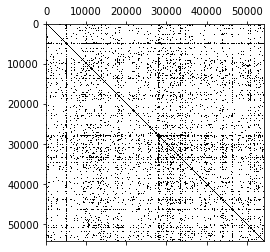

In [127]:
plt.spy(cast_adj)

In [130]:
np.save('cast_adj',cast_adj)

## Load cast adjacency matrix

In [3]:
cast_adj = np.load('cast_adj.npy')

In [4]:
cast_adj.shape

(54201, 54201)

In [6]:
diag_cast_adj = np.diag(np.diag(cast_adj))
print(diag_cast_adj)

[[ 17.   0.   0. ...   0.   0.   0.]
 [  0.   2.   0. ...   0.   0.   0.]
 [  0.   0. 111. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...  33.   0.   0.]
 [  0.   0.   0. ...   0.  42.   0.]
 [  0.   0.   0. ...   0.   0.  15.]]


In [7]:
clean_cast_adj = cast_adj - diag_cast_adj
node_degree = clean_cast_adj.sum(axis=0)

In [50]:
np.save('clean_cast_adj',clean_cast_adj)

In [42]:
most_connected_actors = np.argsort(- node_degree)
print(most_connected_actors[:20])

[45587 37516 47894 34677  3174 31252   999 40263 39594  6817 17582 43600
 50772 15004 35805 20239 53155  4737  9045 26028]


## Get cast unions length mat

In [ ]:
col = 'cast'
cast_col = num_cast_nodes_df[col]
cast_adj_union = get_unions_length_adj_mat(cast_col)
print(cast_adj_union)

In [ ]:
np.save('cast_adj_union',cast_adj_union)

## Get movies intersections length mat

In [91]:
col = 'title'
movie_col = num_cast_nodes_df[col]
movie_adj = get_intersections_length_adj_mat(movie_col)
print(movie_adj)

Time:  1857.7277697949994
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [92]:
np.save('movie_adj',movie_adj)

## Get movies union length mat

In [ ]:
col = 'title'
movie_col = num_cast_nodes_df[col]
movie_adj_union = get_unions_length_adj_mat(movie_col)
print(movie_adj_union)

In [ ]:
np.save('movie_adj_union',movie_adj_union)

## Get directors intersections lenght mat

In [ ]:
col = 'crew'
crew_col = num_cast_nodes_df[col]
crew_adj = get_intersections_length_adj_mat(crew_col)
print(crew_adj)

In [ ]:
np.save('crew_adj',crew_adj)

## Get directors union length mat

In [ ]:
col = 'crew'
crew_col = num_cast_nodes_df[col]
crew_adj_union = get_unions_length_adj_mat(crew_col)
print(crew_adj_union)

In [ ]:
np.save('crew_adj_union',crew_adj_union)

## Get production companies intersections length mat

In [ ]:
col = 'production_companies'
prod_comp_col = num_cast_nodes_df[col]
prod_comp_adj = get_intersections_length_adj_mat(prod_comp_col)
print(prod_comp_adj)

In [ ]:
np.save('prod_comp_adj',prod_comp_adj)

## Get production companies unions length mat

In [ ]:
col = 'production_companies'
prod_comp_col = num_cast_nodes_df[col]
prod_comp_adj_union = get_unions_length_adj_mat(prod_comp_col)
print(prod_comp_adj_union)

In [ ]:
np.save('prod_comp_adj_union',prod_comp_adj_union)

## Get genres intersections length mat

In [ ]:
col = 'genres'
genres_col = num_cast_nodes_df[col]
genres_adj = get_intersections_length_adj_mat(genres_col)
print(genres_adj)

In [ ]:
np.save('genres_adj',genres_adj)

## Get genres unions length mat

In [ ]:
col = 'genres'
genres_col = num_cast_nodes_df[col]
genres_adj_union = get_unions_length_adj_mat(genres_col)
print(genres_adj_union)

In [ ]:
np.save('genres_adj_union',genres_adj_union)

## Tests

In [117]:
dict_actor_id

{'  Jorge de los Reyes ': 0,
 ' Larry Mullen Jr.': 1,
 '"Weird Al" Yankovic': 2,
 "'Snub' Pollard": 3,
 "'Wild Bill' Laczko": 4,
 '50 Cent': 5,
 'A. David Burleigh': 6,
 'A. Frank Ruffo': 7,
 'A. J. Benza': 8,
 'A. J. Langer': 9,
 'A. Jay Radcliff': 10,
 'A. Michael Baldwin': 11,
 'A. Russell Andrews': 12,
 'A.C. Green': 13,
 'A.D. Johnson': 14,
 'A.D. Miles': 15,
 'A.J. Adelman': 16,
 'A.J. Balance': 17,
 'A.J. Benza': 18,
 'A.J. Buckley': 19,
 'A.J. Cook': 20,
 'A.J. DeLucia': 21,
 'A.J. Johnson': 22,
 'A.J. McLean': 23,
 'A.J. Riebli III': 24,
 'A.J. Sexton': 25,
 'A.J. Tecce': 26,
 'A.J. Verel': 27,
 'A.S. Byron': 28,
 'A.k. Steppa': 29,
 'AJ Bowen': 30,
 'AJ Diana': 31,
 'AJ Meijer': 32,
 'AJ Michalka': 33,
 'Aadukalam Naren': 34,
 'Aakomon Jones': 35,
 'Aaliyah': 36,
 'Aamir Khan': 37,
 'Aaran Thomas': 38,
 "Aaron 'Deuce' Cooke": 39,
 'Aaron Abrams': 40,
 'Aaron Ashmore': 41,
 'Aaron Au': 42,
 'Aaron Berg': 43,
 'Aaron Brown': 44,
 'Aaron Brumfield': 45,
 'Aaron Burns': 46,
 'Aar

### Test consistency of data

In [138]:
# Testing if the intersection of casts of the actors with themselves is correct
assert (len(num_cast_nodes_df.loc[dict_actor_id.get('  Jorge de los Reyes '),'cast'])==17),"Test failed"
print("Test OK")

In [142]:
# Testing if the intersection of casts of the actors with themselves is correct
assert (len(num_cast_nodes_df.loc[dict_actor_id.get("\"Weird Al\" Yankovic"),'cast'])==111),"Test failed"
print("Test OK")

Test OK


In [96]:
actors_df[actors_df["actors"]=="Micky Jukovic"]

,actor_id,actors,gender,order
36728,36728,Micky Jukovic,0,[14]


In [ ]:
diag_cast_adj = 

In [88]:
dict_actor_id.get("Sam Worthington")

45463

In [86]:
actors_df[actors_df["actors"]=="Adriana Barraza"]

,actor_id,actors,gender,order
497,497,Adriana Barraza,1,"[23, 5, 6, 4, 0, 11]"


In [118]:
actors_df[actors_df["actors"]==" Larry Mullen Jr."]

,actor_id,actors,gender,order
1,1,Larry Mullen Jr.,2,[4]


In [99]:
dict_actor_id.get("Andreas Berg")

2406

In [47]:
actors_df[actors_df['actor_id']==6817]

,actor_id,actors,gender,order
6817,6817,Bruce Willis,2,"[0, 3, 21, 18, 0, 3, 0, 0, 0, 10, 0, 0, 0, 0, ..."


In [108]:
nodes_df.loc[0,'cast']

{'Andreas Berg',
 'Anna Haack',
 'Arcelia Ramírez',
 'Esther Maria Pietsch',
 'Frank W. Rima',
 'Franziska Kruse',
 'Hector Kotsifakis',
 'Ingeborg Schöner',
 'Jorge Ramírez Suárez',
 'Karl Friedrich',
 'Kristyan Ferrer',
 'Luis Rosales',
 'Marcel Batangtaris',
 'Marius Biegai',
 'Michèle Akouvi Müller',
 'Micky Jukovic',
 'Rüdiger Evers'}

In [109]:
reduced_nodes_df.loc[0,'cast']

{2406,
 3057,
 3645,
 16048,
 17005,
 17061,
 19688,
 20582,
 26325,
 27832,
 29816,
 32377,
 33136,
 33711,
 36682,
 36728,
 45143}

In [110]:
# Test number of actors
len(np.unique(actors_agg_df.index.values))

54201

In [44]:
test_movie_id = actors_agg_df.loc["Sam Worthington"]["movie_id"]
test_movie_id

{0, 43, 132, 206, 599, 671, 787, 1146, 1448, 2147}

In [45]:
test_movies_df = unique_movies_df[unique_movies_df[new_movie_id_col].isin(test_movie_id)]
test_movies_df = test_movies_df.merge(pr_movies_df,right_on=movie_id_col,left_on=movie_id_col)
test_movies_df[[movie_id_col,new_movie_id_col,'title']]

,movie_id,new_movie_id,title
0,19995,0,Avatar
1,534,43,Terminator Salvation
2,57165,132,Wrath of the Titans
3,18823,206,Clash of the Titans
4,10592,599,Hart's War
5,253412,671,Everest
6,13922,787,The Great Raid
7,49527,1146,Man on a Ledge
8,144336,1448,Sabotage
9,48289,2147,The Debt


In [46]:
"Sam Worthington" in pr_credits_df.loc[0,'cast']

False

In [47]:
pr_credits_df.loc[0]

movie_id                                                19995
cast        {Mike Bodnar, James Gaylyn, Scott Lawrence, St...
crew                                          {James Cameron}
actors                                        Sam Worthington
Name: 0, dtype: object